<a href="https://colab.research.google.com/github/Rendy3001/BDS/blob/main/K%C3%B3pia_z%C3%A1pisn%C3%ADka_FirstEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Exploratory Data Analysis (EDA) and Visualization


## FINDEX (Global Financial Index Microdata) and it's business context

The Global Findex database is the most comprehensive dataset on adult financial behaviors worldwide, capturing insights into how individuals save, borrow, make payments, and manage financial risks. Initiated by the World Bank in 2011, the dataset is based on nationally representative surveys of over 150,000 adults across more than 140 economies. The 2021 edition provides updated indicators on the use of both formal and informal financial services.

For this analysis, we will conduct an Exploratory Data Analysis (EDA) to uncover key patterns and trends in the financial behaviors of individuals globally. As this analysis is undertaken by a group of finance students with a strong interest in banking and personal finance, our focus will be on examining how different demographics access and use financial services across various economies.




## 1. Data Cleaning and Manipulation

In [2]:
# Importning libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Initially, the data couldn’t be read with UTF-8 due to special characters. Using ChatGPT we found that latin-1 supports these characters, allowing for proper file decoding.
# data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip')

In [3]:
# Reading the data using the raw URL on github
data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip', encoding='latin-1')

### Initial Data Structure Overview: Head, Info, Shape, Index, and Column Names

In [12]:
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [10]:
data.shape

(143887, 128)

In [9]:
data.index

RangeIndex(start=0, stop=143887, step=1)

In [133]:
data.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

### Checking for missing values

In [4]:
#Due to the size of the Dataset we filter columns with missing values greater than 0. We look further into all the missing values
# with pd.set_option('display.max_rows', None) was used afterwards using
# pd.reset_option('display.max_rows')

pd.reset_option('display.max_rows')
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

,0
regionwb,1000
age,467
emp_in,3502
urbanicity_f2f,68243
account_mob,61181
...,...
fin45_1,33106
fin45_1_China,140387
receive_agriculture,29606
remittances,29606


In [5]:
# Filtering rows where 'regionwb' is missing
missing_region = data[data['regionwb'].isnull()]

# Groupby 'economy' and count the number of missing 'regionwb' for each country
missing_by_country = missing_region.groupby('economy').size()

print(missing_by_country)

economy
Taiwan, China    1000
dtype: int64


Its clear that there are significant missing values in the dataset. However, many of these missing values result from certain follow up questions not being asked to all participants, which accounts for the bulk of the missing data. Additionally, we notice some missing information regarding the age, region, and employment status of some participants. Since the missing values in these key categories (age, and workforce status) is quite small compared to the dataset size, it has been decided to remove these rows as we don't want to simulate age or workforce status. For the missing data in region we could have used the economy/country column to fill in the correct region, but as the region is also based on high income or not we decided to remove these missing region rows as well

The columns with a high percentage of missing data (up to 90%) were removed, as they generally represent the very niche or specific follow-up questions. This simplification streamlines the dataset without affecting its overall quality, as our focus is on a broader analysis rather than specific topics like how domestic remittances were received instead looking at general saving habits as an example

In [54]:
# Removing the rows with missing values in 'regionwb', 'age', and 'emp_in'
data_cleaned = data.dropna(subset=['age', 'emp_in', 'regionwb']).copy()

# Removing columns with more than 4000 missing values
missing_threshold = 4000
cols_to_drop = data_cleaned.columns[data_cleaned.isnull().sum() > missing_threshold]

# Dropping the columns
data_cleaned = data_cleaned.drop(columns=cols_to_drop)

# Cleaned dataset info
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138973 entries, 0 to 143886
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            138973 non-null  object 
 1   economycode        138973 non-null  object 
 2   regionwb           138973 non-null  object 
 3   pop_adult          138973 non-null  float64
 4   wpid_random        138973 non-null  int64  
 5   wgt                138973 non-null  float64
 6   female             138973 non-null  int64  
 7   age                138973 non-null  float64
 8   educ               138973 non-null  int64  
 9   inc_q              138973 non-null  int64  
 10  emp_in             138973 non-null  float64
 11  account            138973 non-null  int64  
 12  account_fin        138973 non-null  int64  
 13  fin2               138973 non-null  int64  
 14  fin14_1            138973 non-null  int64  
 15  fin14a             138973 non-null  int64  
 16  fin14a1

In [108]:
data_cleaned[['educ_label','saved']]
saving = data_cleaned.groupby('educ_label')['saved'].mean()
saving

,saved
educ_label,
Primary School or Less,0.354324
Secondary School,0.557308
Tertiary Education or More,0.709103


In [107]:
labels = {1: 'Primary School or Less', 2: 'Secondary School', 3: 'Tertiary Education or More'}
data_cleaned['educ_label'] = data_cleaned['educ'].map(labels)
data_cleaned.educ_label.unique()

array(['Secondary School', 'Primary School or Less',
       'Tertiary Education or More', nan], dtype=object)

In [15]:
data_cleaned.economy.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.',
       'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon',
       'Lesotho', 

In [106]:
data_cleaned.female.head()
labels = {1: 'F', 2: 'M'}
data_cleaned['female_label'] = data_cleaned['female'].map(labels)
data_cleaned.female_label

,female_label
0,M
1,M
2,F
3,M
4,F
...,...
143882,M
143883,F
143884,F
143885,M


## Business Context

Now that the data has been cleaned, we have a clearer understanding of the columns, allowing us to prepare the dataset for use in a business context. Given the nature of the data, which includes information such as respondent education level, income, savings, borrowing behavior, and access to financial services, there are several ways this dataset could be used in a business environment or by policymakers to assess the economic conditions of different regions/economies with a focus on financial inclusion.

Applications which we will examine further:  

**Demographic-Specific Marketing:** Data on financial inclusion by gender, age, and income can help businesses create targeted marketing campaigns. For example, if women in a specific region are less likely to have a bank account, a targeted campaign emphasizing financial independence and security could resonate well.

**Investment in Fintech Solutions:** The rise in digital payments and mobile money usage highlighted in the dataset can guide businesses to invest in or partner with fintech companies. This can be particularly beneficial in regions where traditional banking services are less accessible.

**Behavioral Insights:** Understanding savings and borrowing behaviors can inform marketing strategies for financial products. For example, if a large portion of the population saves informally, marketing efforts could focus on the benefits of formal savings products.

**General Economic Analysis:** This dataset can also be used by businesses or policymakers to assess the economic conditions of different regions and look into how education and income levels influence financial behaviors such as saving, borrowing, and account ownership across different regions?


In [17]:
data_cleaned.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,borrowed,receive_wages,receive_transfers,receive_pension,pay_utilities,mobileowner,internetaccess,anydigpayment,year,educ_label
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,1,4,4,4,1,1,2,1,2021,Secondary School
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,1,4,4,4,4,1,2,0,2021,Primary School or Less
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,1,4,4,4,4,2,2,0,2021,Primary School or Less
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,0,2,4,4,4,1,2,0,2021,Primary School or Less
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,1,4,4,4,4,2,2,0,2021,Primary School or Less


In [109]:
data_cleaned[['educ_label', 'female_label', 'age', 'inc_q', 'economy']]
desc = data_cleaned.groupby('educ_label')[['female_label', 'age', 'inc_q', 'economy']]
desc.head()

,female_label,age,inc_q,economy
0,M,43.0,4,Afghanistan
1,M,55.0,3,Afghanistan
2,F,15.0,2,Afghanistan
3,M,23.0,4,Afghanistan
4,F,46.0,1,Afghanistan
5,M,30.0,2,Afghanistan
9,M,40.0,4,Afghanistan
10,M,24.0,4,Afghanistan
15,F,35.0,3,Afghanistan
17,F,23.0,2,Afghanistan


In [33]:
data_cleaned['age'].min()

15.0

In [110]:
#Gender distribution and educational distribution
gender_distribution = data_cleaned['female_label'].value_counts(normalize = True) * 100
educational_distribution = data_cleaned['educ_label'].value_counts(normalize = True) * 100

In [36]:
gender_distribution

,proportion
female_label,
F,53.413253
M,46.586747


In [37]:
educational_distribution

,proportion
educ_label,
Secondary School,50.800700
Primary School or Less,27.348214
Tertiary Education or More,21.851086


In [98]:
#Age categories
labels = ['Teens', 'Young Adults', 'Middle-Aged', 'Seniors', 'Elderly']
bins = [0, 19, 35, 55, 70, 100]
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=bins, labels=labels, right=False)

In [99]:
data_cleaned['age_group'].head()

,age_group
0,Middle-Aged
1,Seniors
2,Teens
3,Young Adults
4,Middle-Aged


In [46]:
#Educationl level comparison between M and F, considering Age
educ_gender_age = data_cleaned.groupby(['educ_label', 'female_label', 'age_group']).size().unstack()
educ_gender_age

<ipython-input-46-652c27022fc5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  educ_gender_age = data_cleaned.groupby(['educ_label', 'female_label', 'age_group']).size().unstack()


age_group                                Teens  Young Adults  Middle-Aged  \
educ_label                 female_label                                     
Primary School or Less     F              1926          6874         7595   
                           M              1539          4237         5409   
Secondary School           F              2817         14364        10662   
                           M              2619         13519        10851   
Tertiary Education or More F                43          5125         6032   
                           M                37          4980         6016   

age_group                                Seniors  Elderly  
educ_label                 female_label                    
Primary School or Less     F                3922     2154  
                           M                2762     1392  
Secondary School           F                5798     2593  
                           M                5100     1911  
Tertiary Education or More F                2727     1218  
                           M                2752     1280

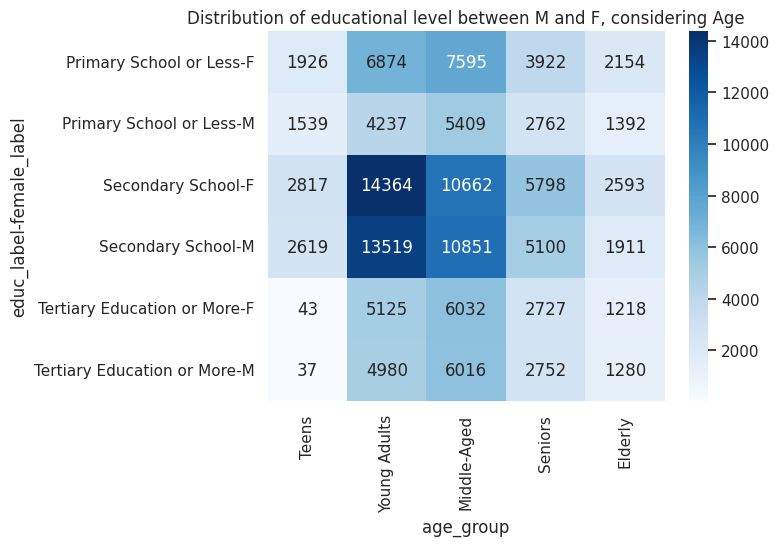

In [92]:
#Distribution of educational level between M and F, considering Age
sns.heatmap(educ_gender_age, annot=True, fmt='d', cmap='Blues')
plt.title('Distribution of educational level between M and F, considering Age')
plt.show()

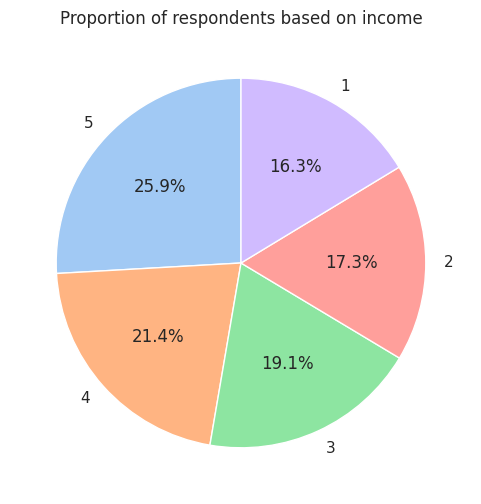

In [93]:
#Proportion of respondets based on income
income_distribution = data_cleaned['inc_q'].value_counts(normalize = True) * 100

plt.figure(figsize=(6, 6))
plt.pie(income_distribution, labels=income_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of respondents based on income')
plt.show()

In [124]:
# Respondent has an account at financial institution or mobile money account or
# both
data_cleaned['account'].value_counts(normalize = True) * 100

,proportion
account,
1,70.026552
0,29.973448


In [172]:
#Respondents with account based on gender
account_based_on_gender = data_cleaned.groupby('female_label')['account'].mean()
account_based_on_gender

,account
female_label,
F,0.661485
M,0.744729


In [173]:
#Income based on gender
income_based_on_gender = data_cleaned.groupby('female_label')['inc_q'].mean()
income_based_on_gender

,inc_q
female_label,
F,3.115223
M,3.367793


In [147]:
data_cleaned['regionwb'].unique()

array(['South Asia', 'Europe & Central Asia (excluding high income)',
       'Middle East & North Africa (excluding high income)',
       'Latin America & Caribbean (excluding high income)', 'High income',
       'Sub-Saharan Africa (excluding high income)',
       'East Asia & Pacific (excluding high income)'], dtype=object)

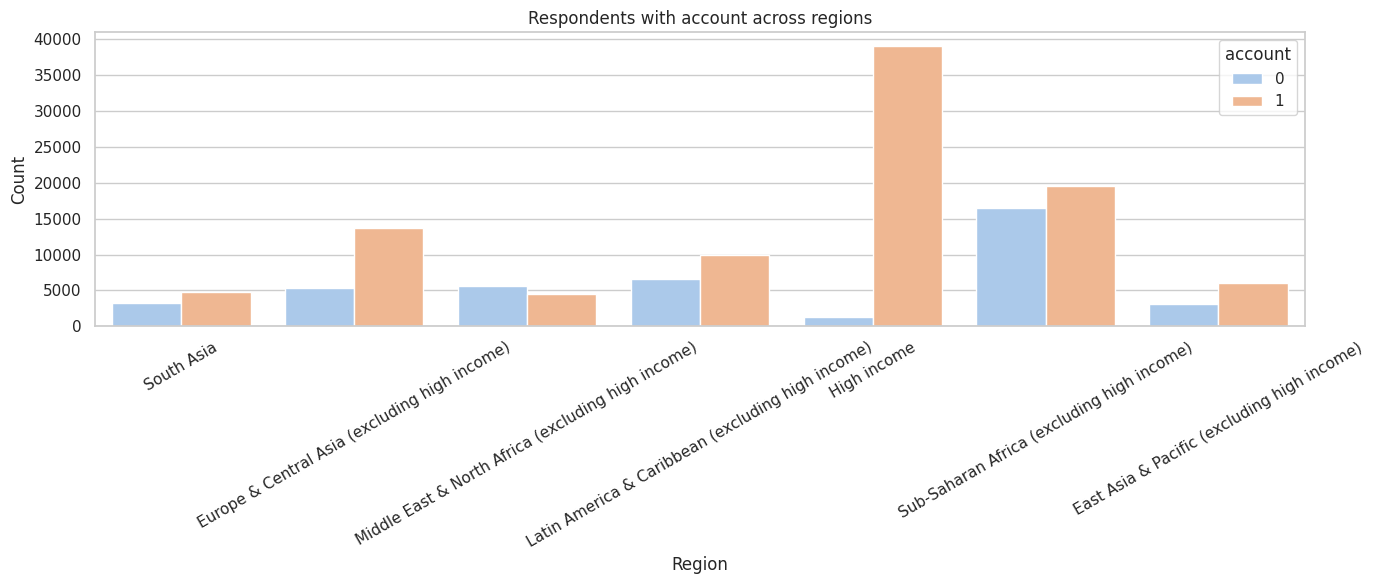

In [149]:
#Respondents with account across regions
region_account_counts = data_cleaned.groupby('regionwb')['account'].mean().sort_values()
plt.figure(figsize=(14, 6))
sns.countplot(x='regionwb', hue='account', data=data_cleaned)
plt.title('Respondents with account across regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

[]

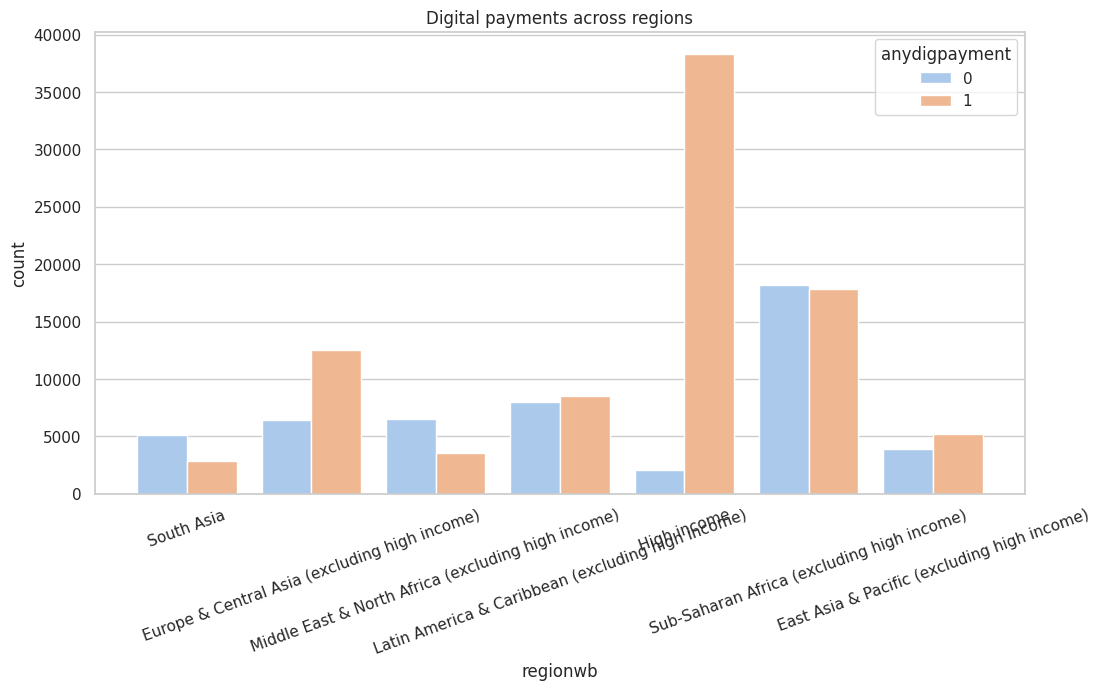

In [171]:
#Digital payments across regions
region_digital_counts = data_cleaned.groupby('regionwb')['anydigpayment'].mean().sort_values()

plt.figure(figsize=(12, 6))

sns.countplot(x='regionwb', hue='anydigpayment', data=data_cleaned)
plt.title('Digital payments across regions')
plt.xticks(rotation=20)
plt.plot()

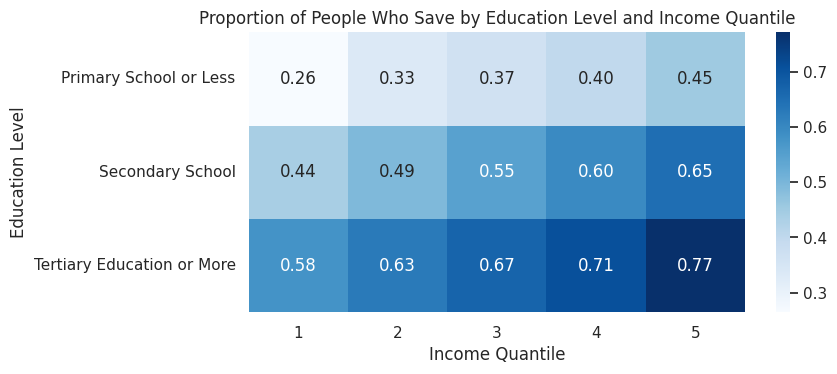

In [120]:
#Distribution of reposndents based on their savings and
# based on income and education

plt.figure(figsize=(8, 8))

saving_by_educ_income = pd.crosstab(data_cleaned['educ_label'], data_cleaned['inc_q'], values=data_cleaned['saved'], aggfunc='mean')

plt.subplot(2, 1, 1)
sns.heatmap(saving_by_educ_income, annot=True, cmap="Blues", fmt=".2f")
plt.title('Proportion of People Who Save by Education Level and Income Quantile')
plt.xlabel('Income Quantile')
plt.ylabel('Education Level')
plt.show()


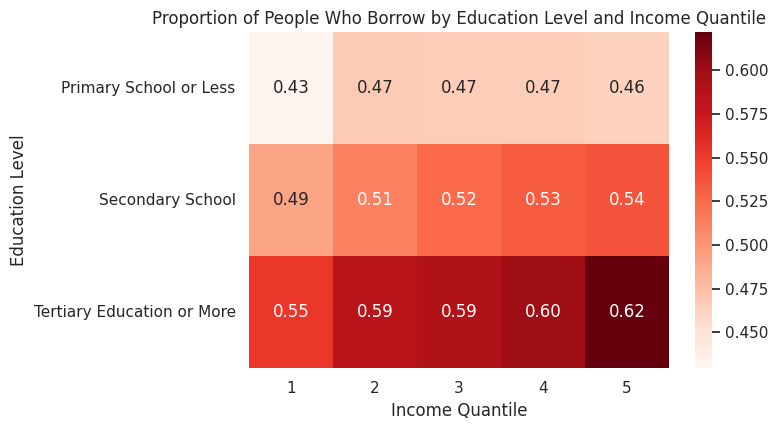

In [119]:
# Considering financial situation of reposndents based on their borrowing and
# based on income and education

plt.figure(figsize=(8, 8))

borrowing_by_educ_income = pd.crosstab(data_cleaned['educ_label'], data_cleaned['inc_q'], values=data_cleaned['borrowed'], aggfunc='mean')

plt.subplot(2, 1, 2)
sns.heatmap(borrowing_by_educ_income, annot=True, cmap="Reds", fmt=".2f")
plt.title('Proportion of People Who Borrow by Education Level and Income Quantile')
plt.xlabel('Income Quantile')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()